# EDA for Benin Solar Dataset

This notebook performs data profiling, cleaning, and exploratory data analysis (EDA) for the Benin solar dataset to prepare it for further modeling and regional comparison.

---


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

sns.set(style="whitegrid")


In [2]:
df = pd.read_csv('../data/benin-malanville.csv', parse_dates=['Timestamp'])

df.head()


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01:00,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04:00,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05:00,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [3]:
df.describe()


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,2022-02-07 12:00:30.000000512,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
min,2021-08-09 00:01:00,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,2021-11-08 06:00:45,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,2022-02-07 12:00:30,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,2022-05-09 18:00:15,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,2022-08-09 00:00:00,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN
std,NaN,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN


In [4]:
missing = df.isna().sum()
missing[missing > 0].sort_values(ascending=False)


Comments    525600
dtype: int64

In [5]:
threshold = 0.05 * len(df)
missing[missing > threshold]


Comments    525600
dtype: int64

In [7]:
cols_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

z_scores = df[cols_to_check].apply(zscore)

outliers = (np.abs(z_scores) > 3)
df['outlier_count'] = outliers.sum(axis=1)

print("Rows with >0 outliers:", df['outlier_count'].gt(0).sum())


Rows with >0 outliers: 7740


In [8]:
key_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB']
df[key_cols] = df[key_cols].fillna(df[key_cols].median())

df_clean = df[df['outlier_count'] <= 3].copy()


In [9]:
df_clean.to_csv('../data/benin_clean.csv', index=False)


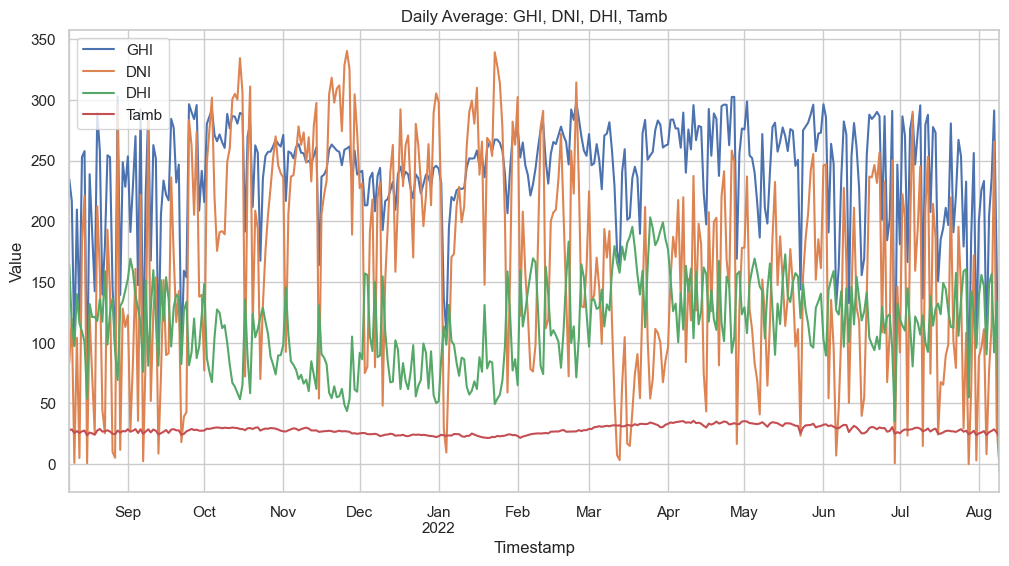

In [11]:
plt.figure(figsize=(12, 6))
for col in ['GHI', 'DNI', 'DHI', 'Tamb']:
    df_clean.set_index('Timestamp')[col].resample('D').mean().plot(label=col)

plt.title('Daily Average: GHI, DNI, DHI, Tamb')
plt.legend()
plt.ylabel('Value')
plt.show()


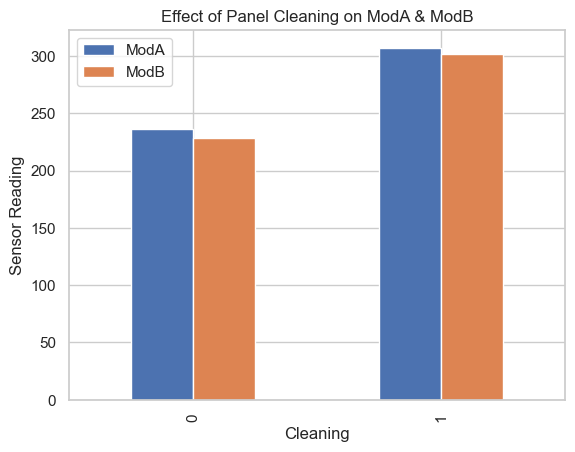

In [12]:
df_clean.groupby('Cleaning')[['ModA', 'ModB']].mean().plot(kind='bar')
plt.title("Effect of Panel Cleaning on ModA & ModB")
plt.ylabel('Sensor Reading')
plt.show()

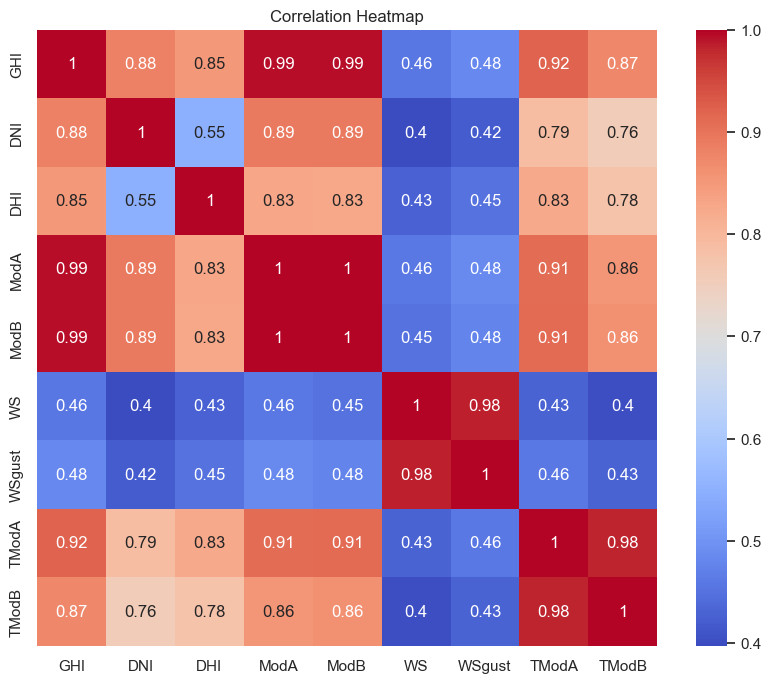

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_clean[cols_to_check + ['TModA', 'TModB']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


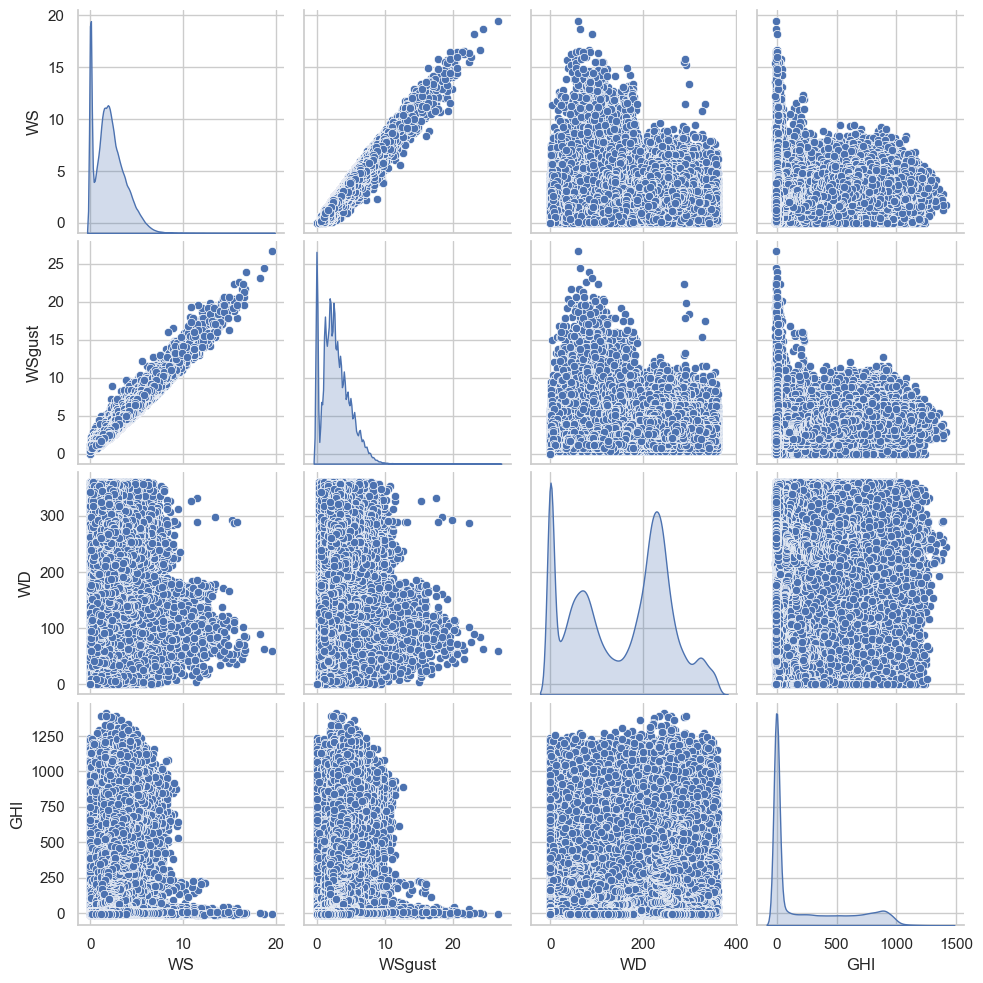

In [14]:
sns.pairplot(df_clean, vars=['WS', 'WSgust', 'WD', 'GHI'], diag_kind='kde')


<Axes: xlabel='RH', ylabel='Tamb'>

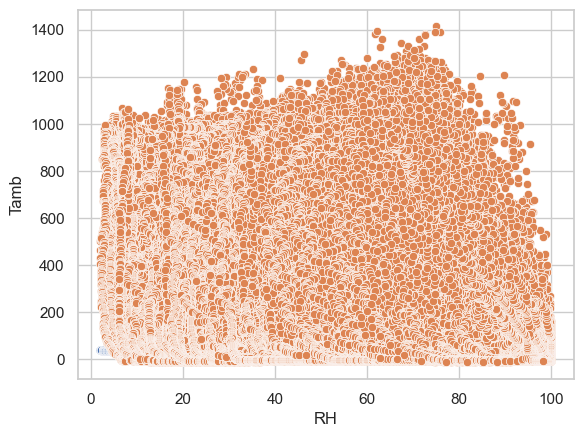

In [15]:
sns.scatterplot(data=df_clean, x='RH', y='Tamb')
sns.scatterplot(data=df_clean, x='RH', y='GHI')


c:\Users\dagiM\Desktop\Kifiya\solar-challenge-week1\venv\Lib\site-packages\seaborn\distributions.py:267: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  baselines[cols] = curves[cols].shift(1, axis=1).fillna(0)


Text(0.5, 0, 'Wind Direction (WD)')

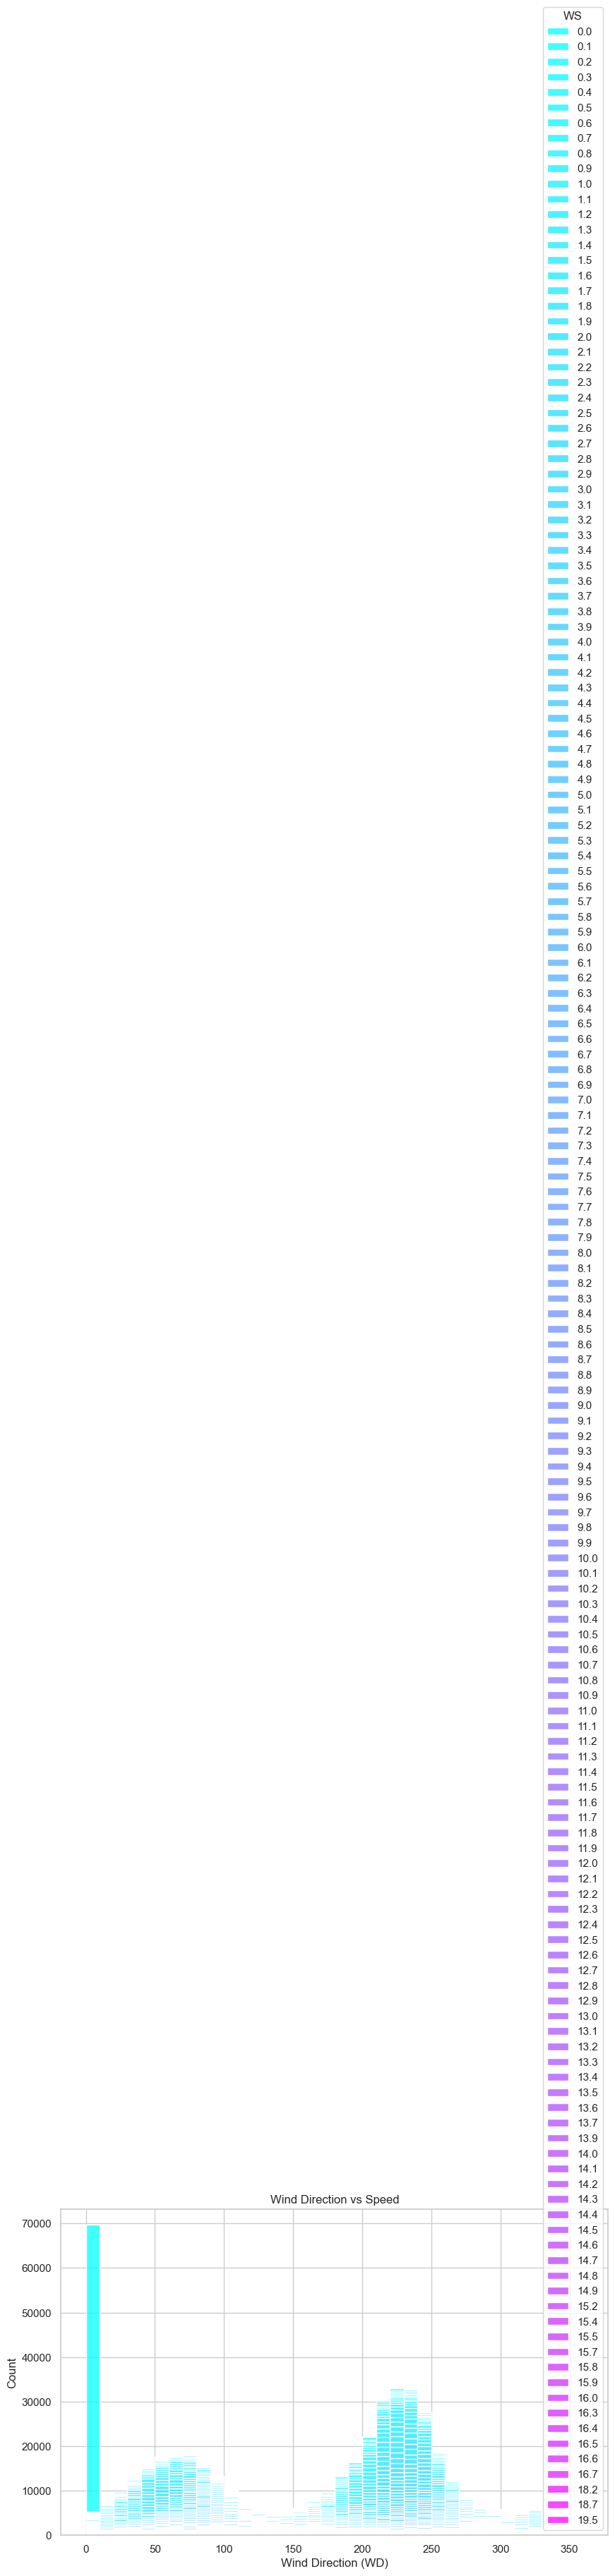

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_clean, x='WD', bins=36, hue='WS', palette='cool', multiple='stack')
plt.title("Wind Direction vs Speed")
plt.xlabel("Wind Direction (WD)")


Text(0.5, 0, 'GHI')

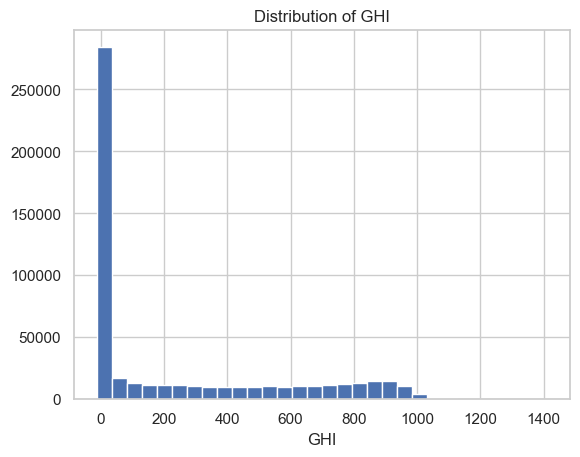

In [17]:
# Histogram
df_clean['GHI'].hist(bins=30)
plt.title("Distribution of GHI")
plt.xlabel("GHI")


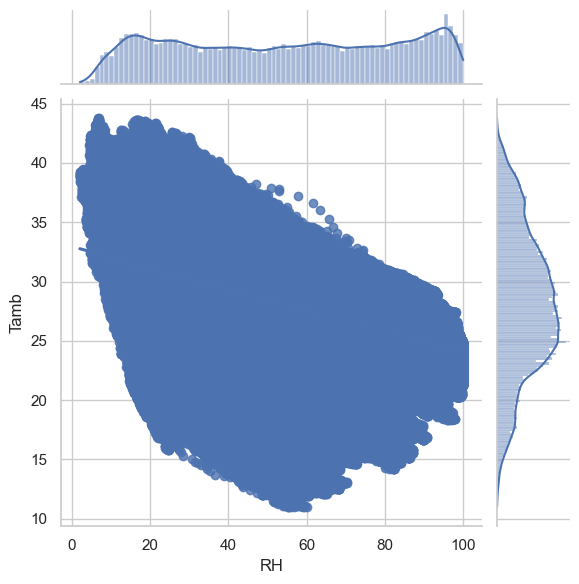

In [18]:
sns.jointplot(data=df_clean, x='RH', y='Tamb', kind='reg')


Text(0, 0.5, 'Tamb')

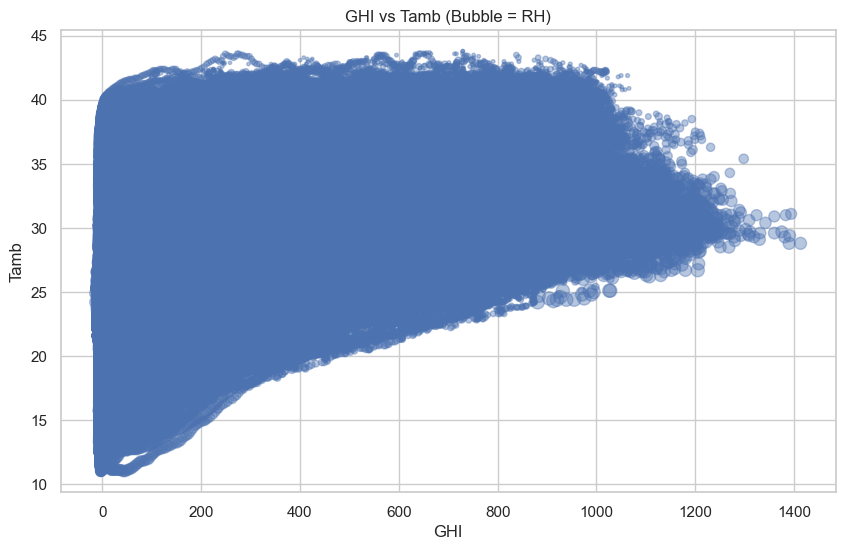

In [19]:
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['GHI'], df_clean['Tamb'], s=df_clean['RH'], alpha=0.4)
plt.title("GHI vs Tamb (Bubble = RH)")
plt.xlabel("GHI")
plt.ylabel("Tamb")
